In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import health data
obese_data = pd.read_csv('cleaned_data/08_13_obese_data_converted_07_12.csv')
obese_data.head()

,FIPS,State,County,PCT_OBESE_ADULTS08,PCT_OBESE_ADULTS13,PCT_OBESE_ADULTS07,PCT_OBESE_ADULTS12
0,1001,AL,Autauga,31.5,34.1,30.98,33.58
1,1003,AL,Baldwin,26.2,27.4,25.96,27.16
2,1005,AL,Barbour,37.6,44.4,36.24,43.04
3,1007,AL,Bibb,32.3,40.3,30.70,38.70
4,1009,AL,Blount,31.9,34.6,31.36,34.06


In [3]:
# Import population data
pop_data= pd.read_csv('cleaned_data/cleaned_population_data_US.csv')
pop_data.head()

,FIPS,State,County,2010 Census Population,"Population Estimate, 2011","Population Estimate, 2012","Population Estimate, 2013","Population Estimate, 2014","Population Estimate, 2015","Population Estimate, 2016"
0,1001.0,AL,Autauga,54571.0,55255.0,55027.0,54792.0,54977.0,55035.0,55416.0
1,1003.0,AL,Baldwin,182265.0,186653.0,190403.0,195147.0,199745.0,203690.0,208563.0
2,1005.0,AL,Barbour,27457.0,27326.0,27132.0,26938.0,26763.0,26270.0,25965.0
3,1007.0,AL,Bibb,22915.0,22736.0,22645.0,22501.0,22511.0,22561.0,22643.0
4,1009.0,AL,Blount,57322.0,57707.0,57772.0,57746.0,57621.0,57676.0,57704.0


In [4]:
# Import restaurant data
restaurants_data = pd.read_csv('cleaned_data/cleaned_restaurant_data_US.csv')
restaurants_data.head()

,FIPS,State,County,Fast Food Restaurant Count 2009,Fast Food Restaurant Count 2014,% Cng Fast Food Restautant Count 09_14,Fast Food Restaurant Count 2009 (per thou),Fast Food Restaurant Count 2014 (per thou),% Cng Fast Food Restaurant Count 09_14 (per thou),Full Service Restaurant Count 2009,Full Service Restaurant Count 2014,% Cng Full Service Restaurant Count 09_14,Full Service Restaurant Count 2009 (per thou),Full Service Restaurant Count 2014 (per thou),% Cng Full Service Restaurant Count 09_14 (per thou),Fast Food Expenditures per capita 2007,Fast Food Expenditures per capita 2012,Full Service Expenditures per capita 2007,Full Service Expenditures per capita 2012
0,1001,AL,Autauga,30,36,20.000000,0.554170,0.649878,17.270512,34,29,-14.705882,0.628059,0.523513,-16.645960,649.511367,674.80272,484.381507,512.280987
1,1003,AL,Baldwin,112,132,17.857143,0.624282,0.659634,5.662750,202,221,9.405941,1.125938,1.104387,-1.914027,649.511367,674.80272,484.381507,512.280987
2,1005,AL,Barbour,21,22,4.761905,0.759301,0.818239,7.762116,12,15,25.000000,0.433887,0.557890,28.579797,649.511367,674.80272,484.381507,512.280987
3,1007,AL,Bibb,7,5,-28.571429,0.305131,0.222163,-27.190844,6,5,-16.666667,0.261540,0.222163,-15.055985,649.511367,674.80272,484.381507,512.280987
4,1009,AL,Blount,24,21,-12.500000,0.418549,0.363832,-13.073035,19,15,-21.052632,0.331351,0.259880,-21.569656,649.511367,674.80272,484.381507,512.280987


In [5]:
# Create groupby object of restaurant data by State
x = restaurants_data.groupby('State')
# Calculate average of expenditures grouped by state
expense_per_state = x['Fast Food Expenditures per capita 2012'].mean()

# Create groupby object of health data by State
y = obese_data.groupby('State')
# Calculate average of obsesity rate grouped by state
avg_obese_rate_per_state = y['PCT_OBESE_ADULTS12'].mean()

In [6]:
# Define x axis values and y axis values 
x_axis = expense_per_state.tolist()
y_axis = avg_obese_rate_per_state.tolist()

## Average Expenditure on Fast Food by State (AVG on AVG)


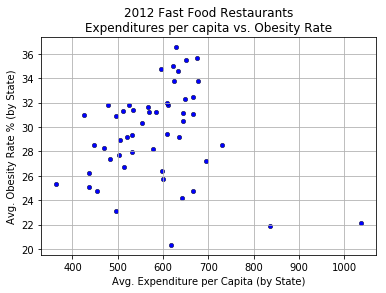

In [7]:
# Create scatter plot
plt.scatter(x_axis, y_axis, edgecolor='black', color='blue', linewidth=0.4, s=20)

# Format look of scatter plot (labels, title, gridlines, etc.)
plt.title("2012 Fast Food Restaurants\n" + "Expenditures per capita vs. Obesity Rate")
plt.xlabel('Avg. Expenditure per Capita (by State)')
plt.ylabel('Avg. Obesity Rate % (by State)')
plt.grid()

# Export Graph
plt.savefig('saved figs/FFR_spending_vs_obesity_rate_2012_Avg_on_Avg.png', dpi=160)

## Actual Average Expenditure on Fast Food by State 

In [8]:
# Create new dataframe using a subset of the restaurants_data dataframe
df = restaurants_data[["FIPS","State","County","Fast Food Expenditures per capita 2012"]]
# Create new column of dataframe that includes the number of obese people per county
df["Obese Number"]= pop_data["Population Estimate, 2012"]*obese_data['PCT_OBESE_ADULTS12']/100
# Add column to df of the 2012 population
df["Pop2012"]=pop_data["Population Estimate, 2012"]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df.head()

,FIPS,State,County,Fast Food Expenditures per capita 2012,Obese Number,Pop2012
0,1001,AL,Autauga,674.80272,18478.0666,55027.0
1,1003,AL,Baldwin,674.80272,51713.4548,190403.0
2,1005,AL,Barbour,674.80272,11677.6128,27132.0
3,1007,AL,Bibb,674.80272,8763.6150,22645.0
4,1009,AL,Blount,674.80272,19677.1432,57772.0


In [10]:
# Create groupby object of df by State
x = df.groupby('State')
# Calculate average of expenditures grouped by state
expense_per_state = x['Fast Food Expenditures per capita 2012'].mean()
expense_per_state.head()

# Calculate total number of obese people grouped by state
obese_people_per_state = x['Obese Number'].sum()
obese_people_per_state.head()

# Calculate total population grouped by state
population_per_state = x['Pop2012'].sum()
population_per_state.head()

# Calculate percent obese per state
st_obese_rt = obese_people_per_state/population_per_state*100
st_obese_rt.head()

State
AK    27.788585
AL    33.614888
AR    33.615267
AZ    25.649789
CA    22.814069
dtype: float64

In [11]:
# Create list of x values to be expenses per person per state
x_axis = expense_per_state.tolist()
# Create list of y values to be percent obsese rate per state
y_axis = st_obese_rt.tolist()


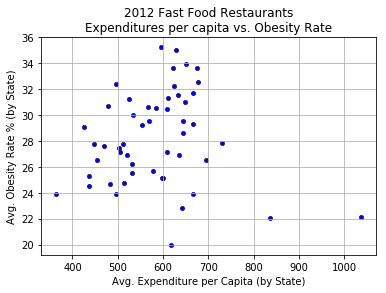

In [12]:
# Create scatter plot
plt.scatter(x_axis, y_axis, edgecolor='black', color='blue', linewidth=0.4, s=20)

# Format look of scatter plot (labels, title, gridlines, etc.)
plt.title("2012 Fast Food Restaurants\n" + "Expenditures per capita vs. Obesity Rate")
plt.xlabel('Avg. Expenditure per Capita (by State)')
plt.ylabel('Avg. Obesity Rate % (by State)')
plt.grid()

# Export Figure
plt.savefig('saved figs/FFR_spending_vs_obesity_rate_2012.png', dpi=160)